In [146]:
import pandas as pd
import numpy as np

In [147]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 2. Feature engineering:
- Feature engineering involves creating or modifying features to improve model performance. In the context of the Titanic dataset, this involves several steps:

###Handling missing values

- Age: The 'Age' column often has missing values. You can impute these missing values using the mean, median, or a more sophisticated method like K-Nearest Neighbors imputation.




- Embarked: This categorical feature may also have missing values. You can impute these by using the most frequent value (mode) of the column.




- Cabin: This column has a large number of missing values and might be best dropped or used to create a new feature representing the deck.


In [148]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.drop(columns=["PassengerId","Cabin", "Ticket"], inplace=True)
df["Sex"] = df["Sex"].map({"male":0, "female": 1})
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,C


###Creating new features
- Family Size: Combine 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard) to create a new feature called 'FamilySize'. This can provide more insight into the impact of family on survival chances.
- IsAlone: Create a binary feature indicating whether a passenger was traveling alone or not, based on 'FamilySize'.
- Age Group: Categorize the 'Age' feature into groups (e.g., child, young adult, adult, elderly). This can capture non-linear relationships with survival and might be more robust to outliers.
Transforming features


In [149]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["IsAlone"] = df["FamilySize"].apply(lambda x:1 if x ==1 else 0)
year = [0,9,17,39,59,120]
labels = ["child", "Teen", "y_adult", "m_adult", "senior"]
df["AgeGroup"] = pd.cut(df["Age"],bins=year,labels=labels)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2,0,y_adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2,0,y_adult
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1,1,y_adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2,0,y_adult
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1,1,y_adult


- Title: Extract titles from the 'Name' column (e.g., Mr., Mrs., Miss, Master). Titles can reveal social status and, consequently, have an impact on survival rates.

In [150]:
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
unique_title = df["Title"].unique()

def simplify_title(title):
    royalty = ['Don', 'Sir', 'Lady', 'the Countess', 'Jonkheer', 'Prince']
    military = ['Major', 'Col', 'Capt']
    professional = ['Dr', 'Rev']
    if title in ['Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title in royalty:
        return 'Royalty'
    elif title in military:
        return 'Military'
    elif title in professional:
        return 'Professional'
    else:
        return title  # Keep common titles like Mr, Mrs, Miss, Master

df["TitleGroup"] = df["Title"].apply(simplify_title)
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,AgeGroup,Title,TitleGroup
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2,0,y_adult,Mr,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2,0,y_adult,Mrs,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1,1,y_adult,Miss,Miss


###Transforming Features
- Encoding categorical features: Machine learning algorithms require numerical input, so categorical features like 'Sex', 'Embarked', 'Pclass', and the newly created 'Title' need to be converted to numerical representations. One-hot encoding is a common method for this, creating new binary columns for each category.


In [151]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,AgeGroup,Title,TitleGroup
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,2,0,y_adult,Mr,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2,0,y_adult,Mrs,Mrs


In [152]:
df = pd.get_dummies(df, columns=["TitleGroup"], drop_first= True)
df = pd.get_dummies(df,columns=["Embarked"], drop_first= True)
df = pd.get_dummies(df, columns=["AgeGroup"], drop_first = True)
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,...,TitleGroup_Mr,TitleGroup_Mrs,TitleGroup_Professional,TitleGroup_Royalty,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_y_adult,AgeGroup_m_adult,AgeGroup_senior
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2,0,...,True,False,False,False,False,True,False,True,False,False
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,0,...,False,True,False,False,False,False,False,True,False,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,1,...,False,False,False,False,False,True,False,True,False,False


####Feature selection
- Dropping irrelevant features: Features like 'PassengerId', 'Name', 'Ticket', and potentially 'Cabin' might not be directly useful for predicting survival and can be dropped.
- Correlation analysis: Use correlation analysis to identify features that are strongly correlated with the target variable ('Survived') and consider removing features that have low correlation or are redundant.

In [153]:
df.drop(columns=["Name","Title", "SibSp", "Parch"], inplace=True)
df.head(2)

,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,TitleGroup_Military,TitleGroup_Miss,TitleGroup_Mr,TitleGroup_Mrs,TitleGroup_Professional,TitleGroup_Royalty,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_y_adult,AgeGroup_m_adult,AgeGroup_senior
0,0,3,0,22.0,7.2500,2,0,False,False,True,False,False,False,False,True,False,True,False,False
1,1,1,1,38.0,71.2833,2,0,False,False,False,True,False,False,False,False,False,True,False,False



- Dropping irrelevant features: Features like 'PassengerId', 'Name', 'Ticket', and potentially 'Cabin' might not be directly useful for predicting survival and can be dropped.
- Correlation analysis: Use correlation analysis to identify features that are strongly correlated with the target variable ('Survived') and consider removing features that have low
correlation or are redundant.
Conclusion.

### Data Normalization for:
  - Models: LR, KNN, XGB
  - Feature: Age, Fare, SibSp, Parch

In [154]:
# Apply logarithmic transformation to the 'Fare' column
df['Fare'] = np.log1p(df['Fare'])
dfNorm = df.copy()
display(dfNorm.head(3))

,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,TitleGroup_Military,TitleGroup_Miss,TitleGroup_Mr,TitleGroup_Mrs,TitleGroup_Professional,TitleGroup_Royalty,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_y_adult,AgeGroup_m_adult,AgeGroup_senior
0,0,3,0,22.0,2.110213,2,0,False,False,True,False,False,False,False,True,False,True,False,False
1,1,1,1,38.0,4.280593,2,0,False,False,False,True,False,False,False,False,False,True,False,False
2,1,3,1,26.0,2.188856,1,1,False,True,False,False,False,False,False,True,False,True,False,False


## Variance Inflation Factor (VIF)
 - VIF is a diagnostic toll that helps detect multicollinearity in regression modles

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = dfNorm[['Pclass', 'Age', 'Fare','FamilySize']]
X = add_constant(X)

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,77.881381,const
1,2.403280,Pclass
2,1.193825,Age
3,2.636869,Fare
4,1.540034,FamilySize


#Spliting dataset into test and train,

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfNorm.drop(columns=["Survived"]), dfNorm["Survived"], test_size=0.2, random_state=42)

In [157]:
display(X_train.head(3))
display(y_train.head(3))

,Pclass,Sex,Age,Fare,FamilySize,IsAlone,TitleGroup_Military,TitleGroup_Miss,TitleGroup_Mr,TitleGroup_Mrs,TitleGroup_Professional,TitleGroup_Royalty,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_y_adult,AgeGroup_m_adult,AgeGroup_senior
331,1,0,45.5,3.384390,1,1,False,False,True,False,False,False,False,True,False,False,True,False
733,2,0,23.0,2.639057,1,1,False,False,True,False,False,False,False,True,False,True,False,False
382,3,0,32.0,2.188856,1,1,False,False,True,False,False,False,False,True,False,True,False,False


,Survived
331,0
733,0
382,0


## Scaling dataset after split to prevent data leakage

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Scale only o training data
X_train[['Pclass', 'Age', 'Fare','FamilySize']] = scaler.fit_transform(X_train[['Pclass', 'Age', 'Fare','FamilySize']])
# Apply same transformation to test data
X_test[['Pclass', 'Age', 'Fare','FamilySize']] = scaler.transform(X_test[['Pclass', 'Age', 'Fare','FamilySize']])

- Feature scaling: Numerical features like 'Age' and 'Fare' may have different scales, which can bias certain models. Scaling techniques like Standardization or Min-Max scaling can normalize these features to a uniform range (e.g., 0 to 1).
- Logarithmic transformation: If a numerical feature like 'Fare' is skewed, a logarithmic transformation can help normalize the distribution and reduce the impact of outliers.

In [159]:
X_train

,Pclass,Sex,Age,Fare,FamilySize,IsAlone,TitleGroup_Military,TitleGroup_Miss,TitleGroup_Mr,TitleGroup_Mrs,TitleGroup_Professional,TitleGroup_Royalty,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_y_adult,AgeGroup_m_adult,AgeGroup_senior
331,-1.614136,0,1.229207,0.437404,-0.554666,1,False,False,True,False,False,False,False,True,False,False,True,False
733,-0.400551,0,-0.503505,-0.322935,-0.554666,1,False,False,True,False,False,False,False,True,False,True,False,False
382,0.813034,0,0.189580,-0.782201,-0.554666,1,False,False,True,False,False,False,False,True,False,True,False,False
704,0.813034,0,-0.272477,-0.790325,0.040096,0,False,False,True,False,False,False,False,True,False,True,False,False
813,0.813034,1,-1.812666,0.529116,3.013909,0,False,True,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.813034,1,-0.657524,-0.814128,-0.554666,1,False,True,False,False,False,False,False,True,False,True,False,False
270,-1.614136,0,0.012390,0.520387,-0.554666,1,False,False,True,False,False,False,False,True,False,True,False,False
860,0.813034,0,0.882665,-0.245215,0.634859,0,False,False,True,False,False,False,False,True,False,False,True,False
435,-1.614136,1,-1.196590,1.877220,1.229621,0,False,True,False,False,False,False,False,True,True,False,False,False



By thoroughly applying EDA, you gain a deep understanding of the Titanic dataset, uncovering relationships between features and survival. This understanding then guides the feature engineering process, where you create and refine features to improve the performance of your machine learning model. These two crucial steps are essential for building effective and accurate models for predicting Titanic passenger survival.


#Logisti Regression

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(C=0.68,penalty='l2',solver = "liblinear")
model.fit(X_train, y_train)


LogisticRegression(C=0.68, solver='liblinear')

In [161]:
features = X_train.columns
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

In [162]:
import numpy as np

feature_importance['OddsRatio'] = np.exp(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='OddsRatio', ascending=False)
display(feature_importance)


,Feature,Coefficient,OddsRatio
9,TitleGroup_Mrs,1.009910,2.745354
1,Sex,0.991482,2.695225
3,Fare,0.342393,1.408313
11,TitleGroup_Royalty,0.130675,1.139597
12,Embarked_Q,0.020790,1.021008
17,AgeGroup_senior,-0.014939,0.985172
5,IsAlone,-0.137725,0.871338
7,TitleGroup_Miss,-0.149103,0.861480
2,Age,-0.342829,0.709760
13,Embarked_S,-0.354741,0.701355


## Visualizing Analysis

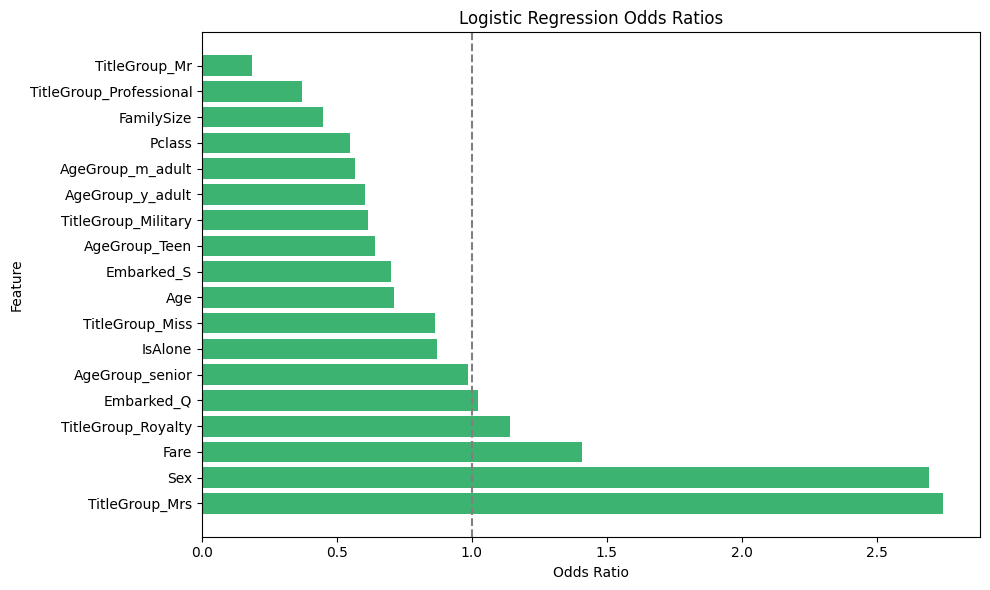

In [163]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['OddsRatio'], color='mediumseagreen')
plt.axvline(1, color='gray', linestyle='--')
plt.title('Logistic Regression Odds Ratios')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# Predict Surivival Outcomes

In [164]:
y_pred = model.predict(X_test)

In [165]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

# Evaluating Model Performance

In [166]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



- Accuracy: Overall correct predictions.
- Precision: How many predicted survivors were correctly predicted.
- Recall: How many actual survivors were correctyl predicted.
- F1-Score; Balance btw precision and recall.

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix_plot(title, y_test, y_pred):

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.2f}")
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(title)
  plt.show()

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



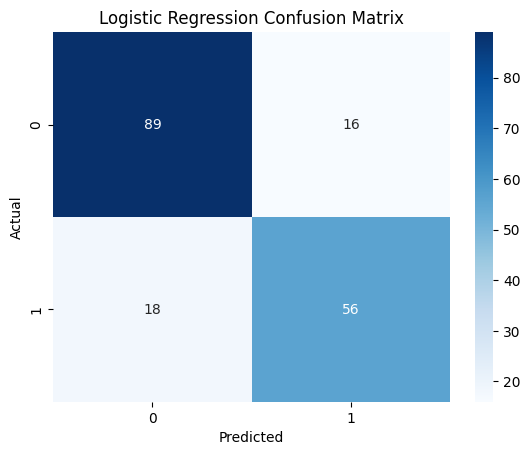

In [168]:
confusion_matrix_plot("Logistic Regression Confusion Matrix", y_test, y_pred)



*   True Negatives (TN)  - 89 - correctly predicted non-survivors
*   False Positives (FP) - 16 - Predicted survival, but they did not
*   False Negatives (FN) - 18 - Predicted non-survival, but they did survive
*   True Positives (TP)  - 56 - Correctly predicted survivors



## K-Nearest Neighbors Classifier

### STEP1: Import and Initialize KNN

In [169]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize the model with K=5 (TUNE K LATER)
knn_model = KNeighborsClassifier(n_neighbors=5)

### STEP 2: Train the Model

In [170]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### STEP 3: Make Predictions

In [171]:
y_pred_knn = knn_model.predict(X_test)

### STEP 4: Evaluate Performance

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



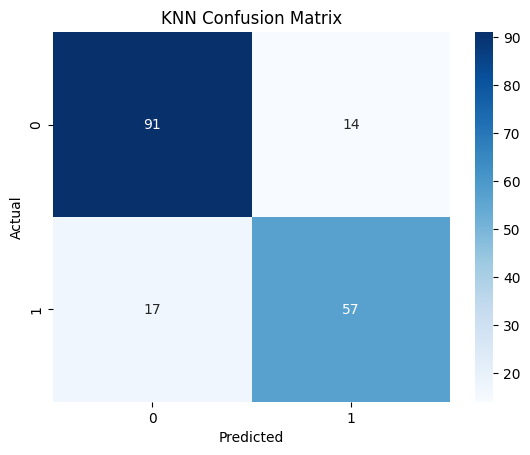

In [172]:
confusion_matrix_plot("KNN Confusion Matrix", y_test, y_pred_knn)

### Step 5: Tune K with Cross-Validation

In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for k in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=5)
  print(f"K={k}, Mean CV Accuracy: {scores.mean(): .4f}")

K=1, Mean CV Accuracy:  0.7514
K=2, Mean CV Accuracy:  0.7920
K=3, Mean CV Accuracy:  0.8075
K=4, Mean CV Accuracy:  0.8103
K=5, Mean CV Accuracy:  0.8146
K=6, Mean CV Accuracy:  0.8132
K=7, Mean CV Accuracy:  0.8104
K=8, Mean CV Accuracy:  0.8146
K=9, Mean CV Accuracy:  0.8244
K=10, Mean CV Accuracy:  0.8216
K=11, Mean CV Accuracy:  0.8272
K=12, Mean CV Accuracy:  0.8356
K=13, Mean CV Accuracy:  0.8427
K=14, Mean CV Accuracy:  0.8413
K=15, Mean CV Accuracy:  0.8314
K=16, Mean CV Accuracy:  0.8357
K=17, Mean CV Accuracy:  0.8328
K=18, Mean CV Accuracy:  0.8370
K=19, Mean CV Accuracy:  0.8300
K=20, Mean CV Accuracy:  0.8286


### Retrain Model with optimal K
-- K=13 gives the highest mean cross-validation accuracy and it does not fluctuates wildly around k=13, accuracy is stable and high from k=11 to k=14 which is a good sign.

In [196]:
best_k = 11
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

### Final model evaluation after best k

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



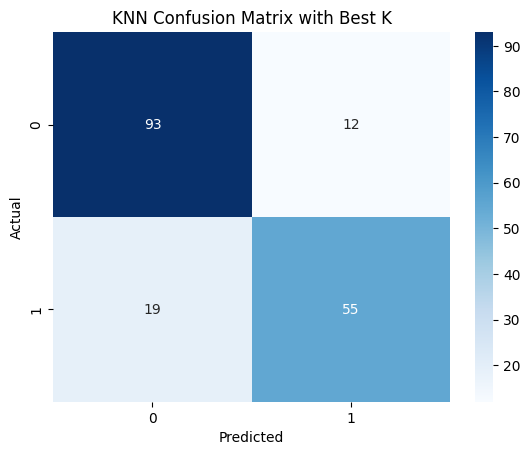

In [197]:
confusion_matrix_plot("""KNN Confusion Matrix with Best K""", y_test, y_pred_best)

### Interview Insight:
 - “I used KNN on the Titanic dataset after scaling features to ensure fair distance comparisons. I tuned the number of neighbors using cross-validation and evaluated performance using accuracy, precision, recall, and confusion matrix. KNN gave me a strong baseline and highlighted the importance of preprocessing in distance-based models.”

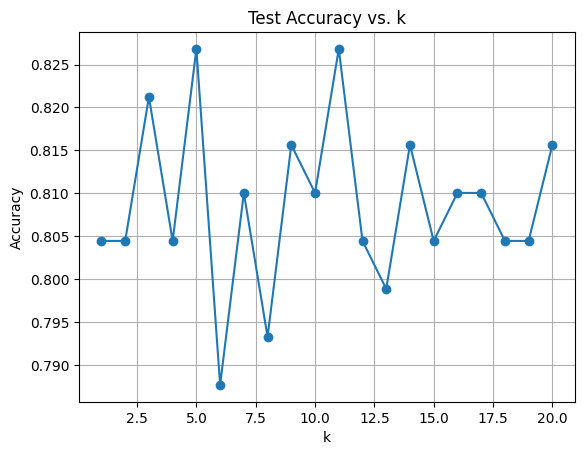

In [185]:
test_accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    test_accuracies.append(acc)

plt.plot(range(1, 21), test_accuracies, marker='o')
plt.title('Test Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


## Conclusion based on accuracy, recall and F1-Score:
  - Metric	k = 5	k = 11	Change:
  - Class 0(Not Survive)
- Precision:	0.84	| 0.83	↓ Slightly less confident.
- Recall:     0.87	| 0.89	↑ Better at catching non-survivors.
- F1-Score	0.85	0.86	↑ Slight improvement overall.
  - Class 1(Survived):

 - Precision	0.80	| 0.82	↑ More confident predictions
 - Recall	0.77	| 0.74	↓ Misses more actual survivors
 - F1-Score	0.79	| 0.78	↓ Slight drop in balance
  - Although both k = 5 and k = 11 yield the same overall accuracy, their class-level metrics differ.
  - k = 5 favors recall for survivors, while k = 11 improves recall for non-survivors.
  - I’d choose based on the cost of false negatives vs false positives in the application domain.